## Accuracy: 92.51354638947252 % (KNN)
## Accuracy: 88.52150834899922 % (LOGISTIC)


### IMPORTING LIBRARIES

In [1]:
# importing neccesary libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd. read_csv('bank.csv', sep=';')

In [3]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(df)), columns=['user'])
df = pd.concat([df_user, df], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [5]:
df.head(5)

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

### DATA ANALYSIS

In [7]:


df.groupby('y').mean()



/tmp/ipykernel_11592/1673364880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [8]:


countNo = len(df[df.y == 'no'])
countYes = len(df[df.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.y))*100)))



Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


### NULL VALUES

In [9]:
df.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
df.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
#Define X and y
X = df.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']


In [12]:
df.head()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Visiualising Data

##### INSIGHT 1

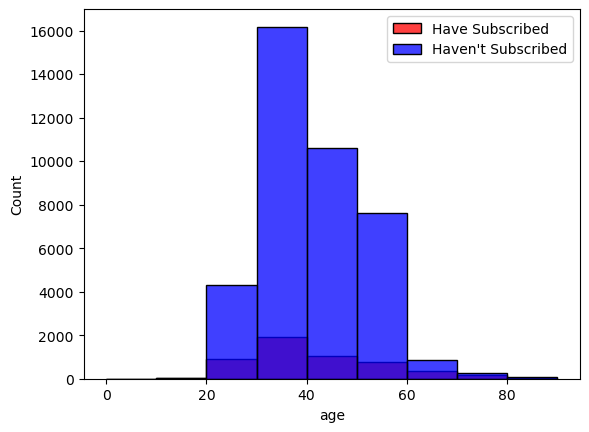

In [13]:
#Age group
bins = range(0, 100, 10)
ax = sns.histplot(df.age[df.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.histplot(df.age[df.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()


##### Different age categories and Subscription rate

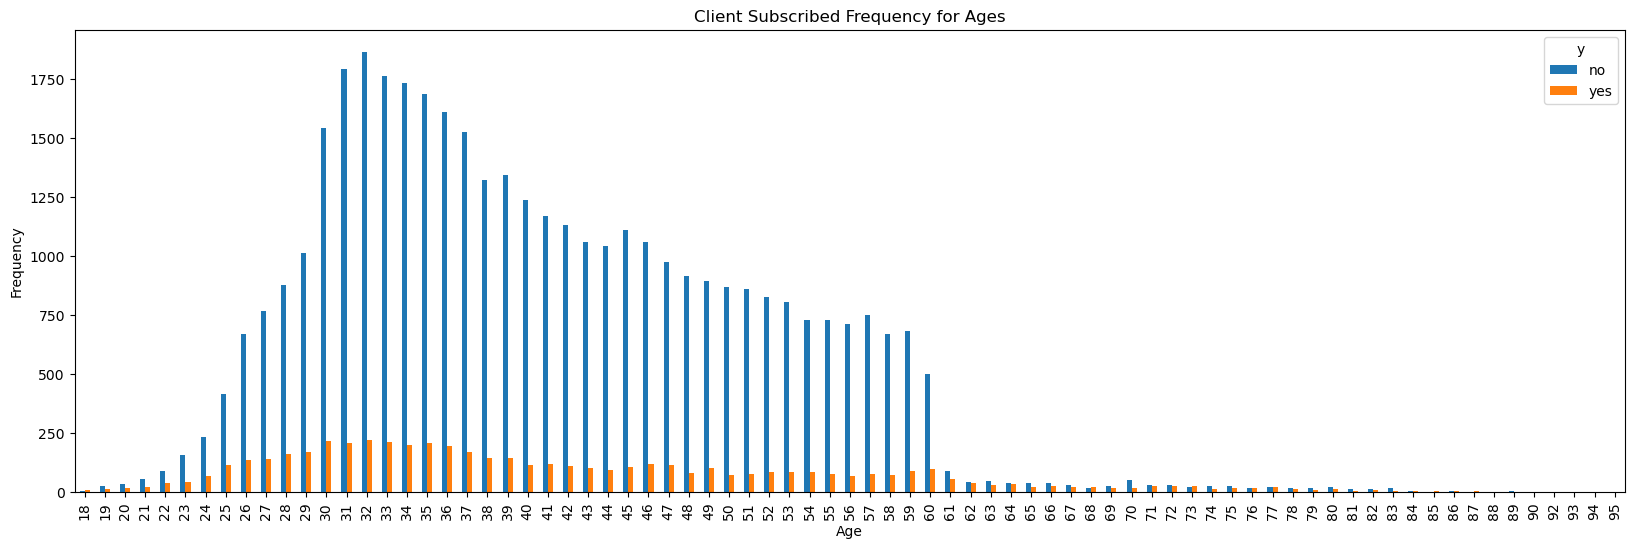

In [14]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



##### Same as above

##### INSIGHT 2


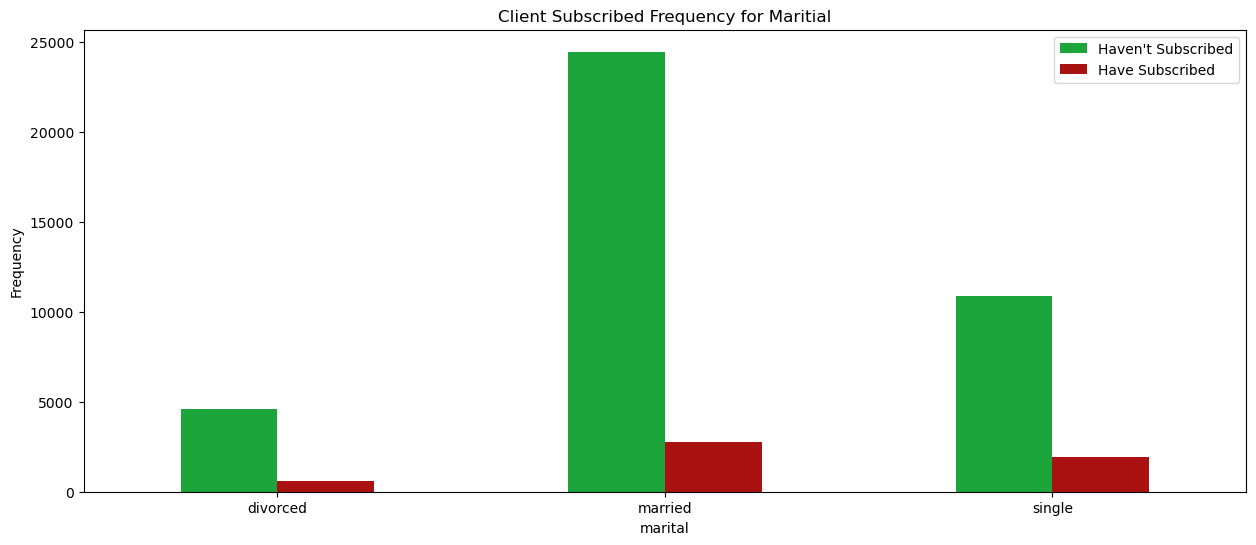

In [15]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()


##### Frequency of subscription based on martial status

### INSIGHT 3



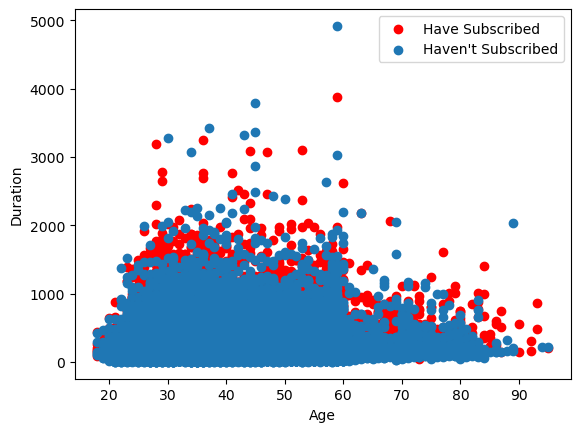

In [16]:
plt.scatter(x=df.age[df.y=='yes'], y=df.duration[(df.y=='yes')], c="red")
plt.scatter(x=df.age[df.y=='no'], y=df.duration[(df.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
plt.show()

##### Age and Duration 

### INSIGHT 4

<Axes: xlabel='age', ylabel='balance'>

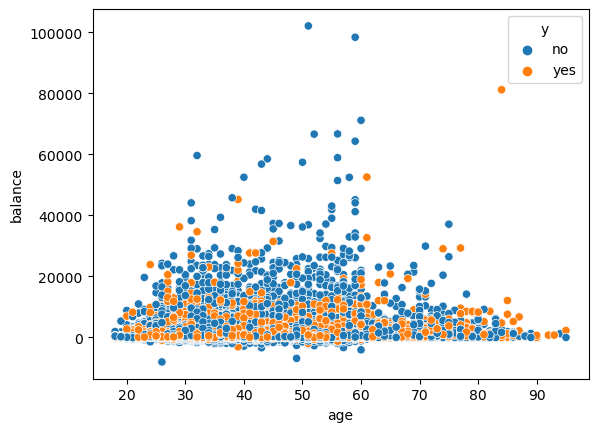

In [17]:


sns.scatterplot(x='age', y='balance',hue='y', data=df)



### INSIGHT 5

/home/snucse/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8852150834899922


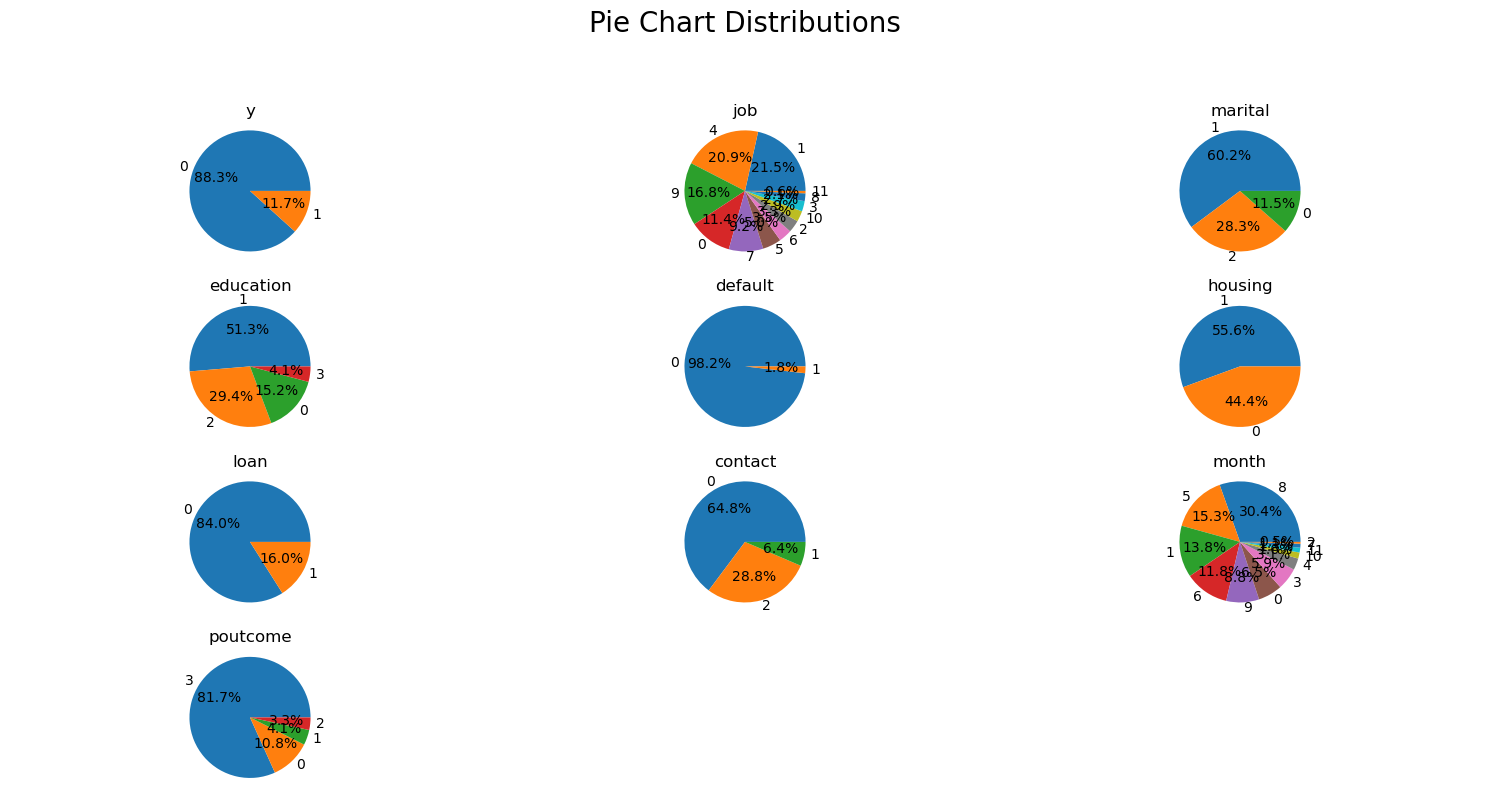

In [42]:
## Pie Plots#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
df.columns
df2 = df[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### INSIGHT 6

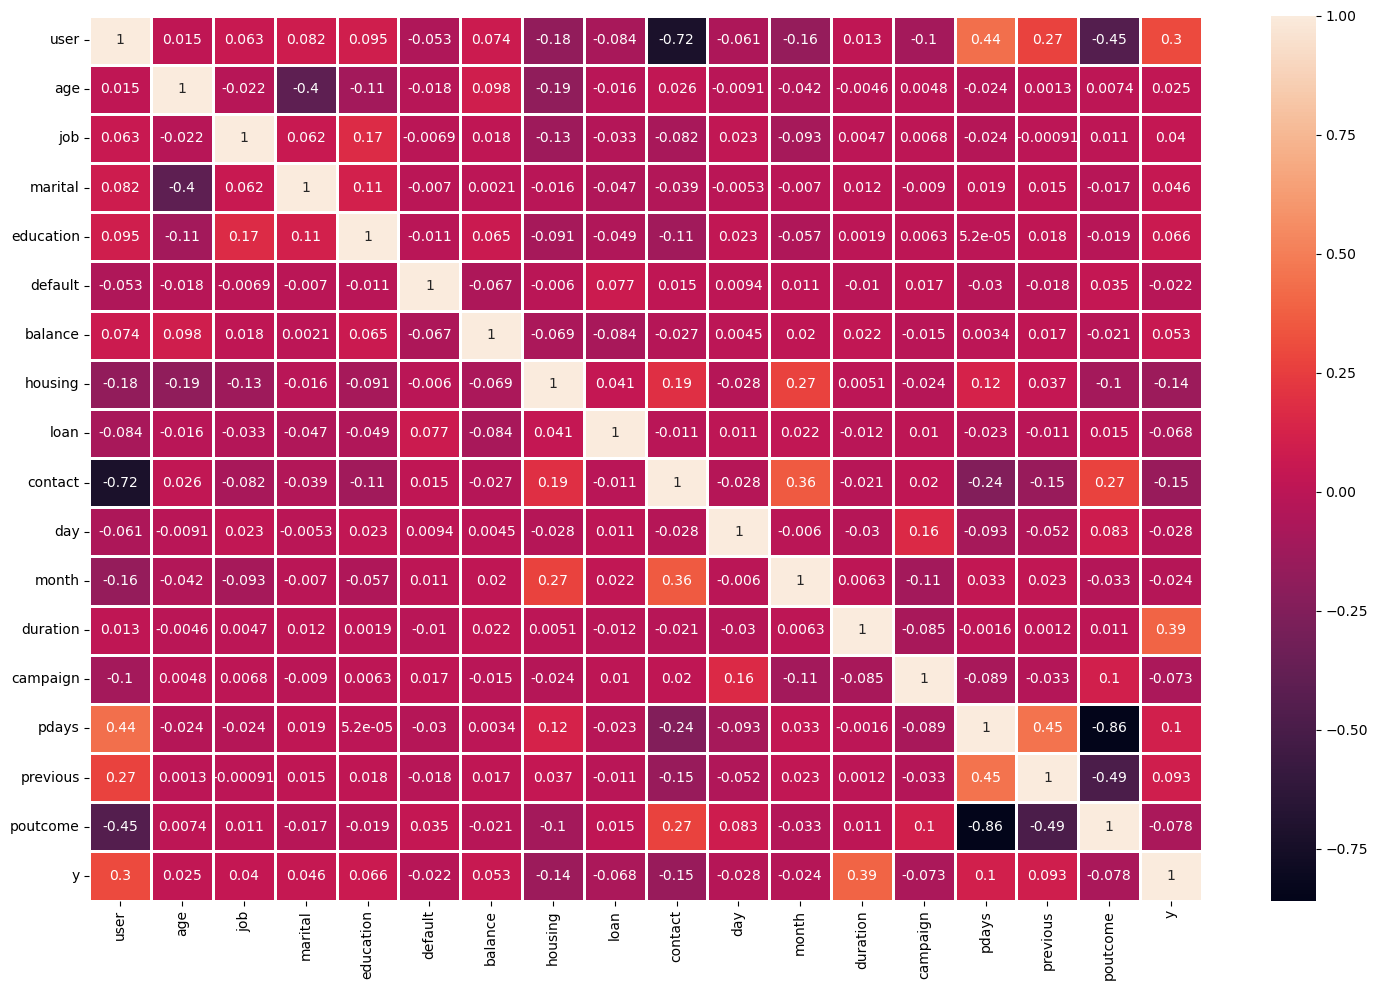

In [39]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(df.corr(), annot=True, linewidth=1)
plt.tight_layout()
plt.show()

continued...
Inferences:
4. Pdays and poutcome are heavily negatively correlated(-0.86). 
5. duration and y seem to have a better correlation that other variables(0.39). 
Same goes with contact and poutcome(0.27).
Since we have done label encoding without one hot, we might be misled.

### MODEL BUILDING FOR KNN

In [31]:
#with 5 neighbours
X = df[['pdays']]  
y = df['poutcome']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Build and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%") 

Accuracy: 92.51354638947252 %


In [32]:
#with 3 neighbours
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")


Accuracy: 91.86110803936747 %


In [33]:
#with 4 neighbours
knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 92.21497290722105 %


In [34]:
#with 6 neighbours
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 92.45825500387039 %


### FEATURE SCALING

In [35]:
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

### LOGISTIC REGRESSION

In [38]:
label_encoder=LabelEncoder()
encoded_columns=[]
for column in df.columns:
    if df[column].dtype == object:
        encoded_columns.append(column)
        df[column]=label_encoder.fit_transform(df[column])
df

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [37]:
#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome'#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy), 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = ac#Logistic regression to find y with label encoding
# Drop poutcome and default features as thye have prenty of unknown values
df2=df.drop(columns=['poutcome', 'default'])

# Separate features (X) and target variable (y)
X = df2.drop('y', axis=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train theAccuracy: 88.52150834899922 %=1)  # All columns except 'y'
y = df2['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)plt.figure(figsize=(15, 10)) 
sns.heatmap(df.corr(), annot=True, linewidth=1)
plt.tight_layout()
plt.show()
print("Accuracy:", accuracy*100,"%")

Accuracy: 0.8852150834899922
Accuracy: 88.52150834899922 %


/home/snucse/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/snucse/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Conclusion:
I have used two models and both have above 85% accuracy. both have been truied to be optimised.\

Using one hot encoding, the accuracy increased by only 0.1%
Hence, I would rather go on with Label Encoding, since the data is easier to work with.